# Relación entre polos y ceros continuos y discretizados

Discretizar por ZOH el sistema de tiempo contínuo $G(s)=\frac{1}{(s+1)^2}$

¿Qué relación se encuentra entre los polos y ceros de $G(s)$ y de $H(z)$?

In [6]:
import control as ctl
import numpy as np
from matplotlib import pyplot as plt

G = ctl.zpk([],[-1,-1],1)
display(G)

poles,zeros = ctl.pzmap(G,plot=False)
print(f"Polos: {poles}\nCeros: {zeros}")

TransferFunction(array([1.]), array([1., 2., 1.]))

Polos: [-1.+6.68896751e-09j -1.-6.68896751e-09j]
Ceros: []


TransferFunction(array([0.00467884, 0.00437708]), array([ 1.        , -1.80967484,  0.81873075]), 0.1)

Polos: [0.90483742+1.03686892e-08j 0.90483742-1.03686892e-08j]
Ceros: [-0.93550468+0.j]


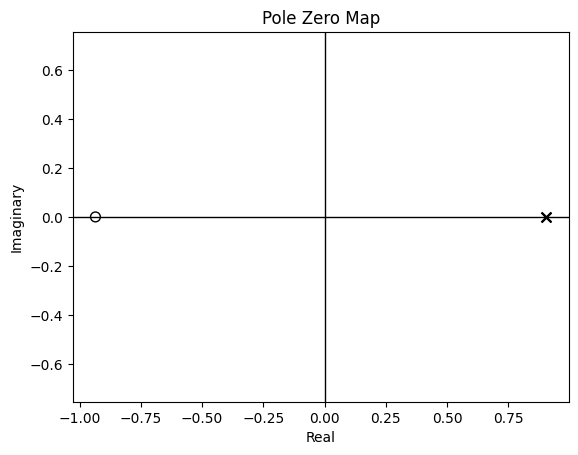

In [7]:
T = 0.1
H = ctl.c2d(G,T,method='zoh')
display(H)

poles_d,zeros_d = ctl.pzmap(H)
print(f"Polos: {poles_d}\nCeros: {zeros_d}")

In [8]:
print("Mapeo polos continuos:\n",np.exp(poles*T))
print(poles_d)

Mapeo polos continuos:
 [0.90483742+6.05242809e-10j 0.90483742-6.05242809e-10j]
[0.90483742+1.03686892e-08j 0.90483742-1.03686892e-08j]


## Aparición de ceros no mínimos

- Repetir para el mismo sistema agregando un polo en -2

TransferFunction(array([1.]), array([1., 4., 5., 2.]))

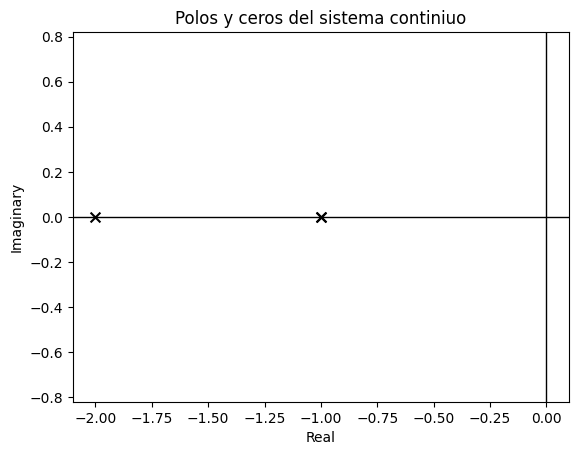

In [9]:
# Repetimos con un sistema de mayor orden

G = ctl.zpk([],[-1,-1,-2],1)
display(G)
poles,zeros = ctl.pzmap(G,title='Polos y ceros del sistema continiuo')


TransferFunction(array([0.00015088, 0.00054637, 0.00012353]), array([ 1.        , -2.62840559,  2.30036719, -0.67032005]), 0.1)

Polos: [0.90483742+5.37258598e-08j 0.90483742-5.37258598e-08j
 0.81873075+0.00000000e+00j]
Ceros: [-3.37884874+0.j -0.24231057+0.j]


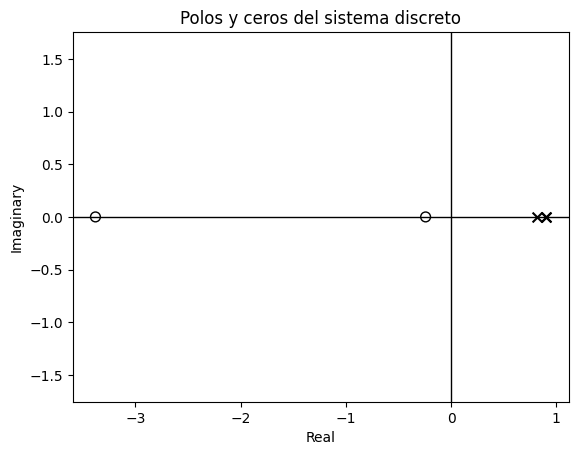

In [10]:
T = 0.1
H = ctl.c2d(G,T,method='zoh')
display(H)
poles_d,zeros_d = ctl.pzmap(H,title='Polos y ceros del sistema discreto')
print(f"Polos: {poles_d}\nCeros: {zeros_d}")


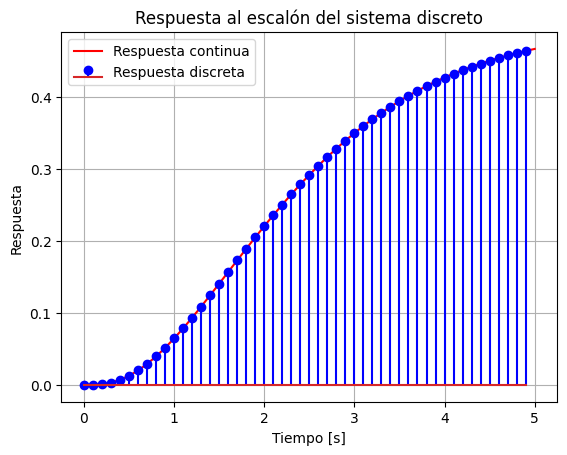

In [11]:
# Comprobamos la respuesta al escalón del sistema discreto
def evaluar_respuestas(G,H,T,Tfin = 5):
    """
    Evaluar la respuesta al escalón de un sistema continuo y su equivalente discreto.
    """
    td,yd = ctl.step_response(H,T=np.arange(0,Tfin,T))
    t,y = ctl.step_response(G,T=Tfin)
    
    plt.plot(t,y,'r',label='Respuesta continua')
    plt.stem(td,yd,'b',label='Respuesta discreta')
    plt.title("Respuesta al escalón del sistema discreto")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Respuesta")
    plt.legend()
    plt.grid()
    plt.show()

evaluar_respuestas(G,H,T)

## Análisis del mapeo de ceros en función de $T$

- Probar qué ocurre al cambiar el grado relativo $r$ del sistema y mostrar cómo varía el módulo de los ceros discretos en función del período de muestreo

- Probar que ceros continuos no mínimos pueden mapearse en ceros discretos mínimos 

TransferFunction(array([-6.,  6.]), array([1., 5., 6.]))

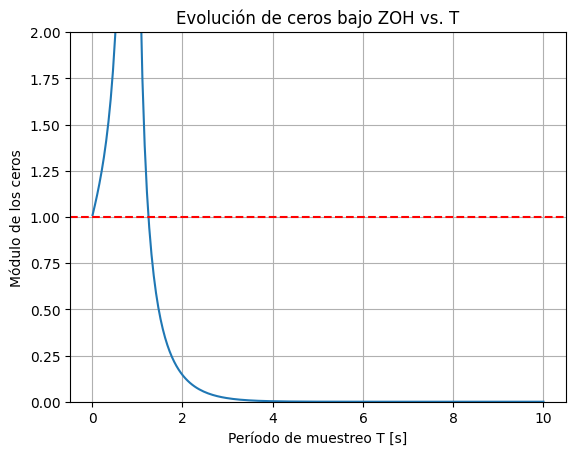

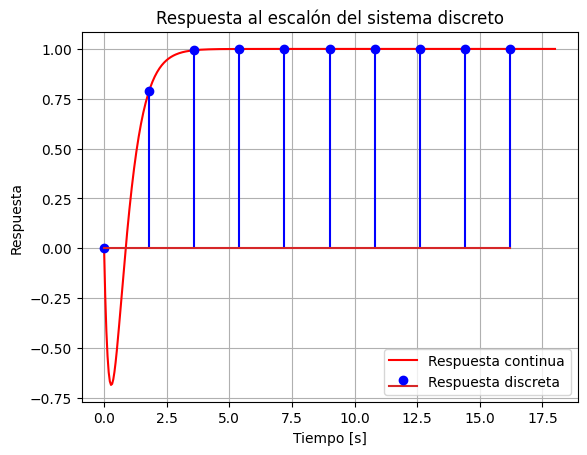

In [15]:
# Rango de T
G=ctl.zpk([1],[-1,-1,-2],-1)
G=ctl.zpk([1],[-2,-3],-6)
display(G)
#G=ctl.zpk([1],[-1,-1],1)
T_values = np.linspace(0.01, 10.0, 200)
z_list = []

# Recolectar ceros para cada T
for T in T_values:
    H = ctl.c2d(G, T, method='zoh')
    p, z = ctl.pzmap(H,plot=False)
    z_list.append(z)

# --- Graficar trayectoria de ceros ---
plt.figure()
plt.plot(T_values,np.abs(z_list))
plt.title("Evolución de ceros bajo ZOH vs. T")
plt.xlabel("Período de muestreo T [s]")
plt.ylabel("Módulo de los ceros")
plt.axhline(1, color='r', linestyle='--', label='Módulo = 1')
plt.ylim(0, 2)
plt.grid()
plt.show()

T = 1.8
H = ctl.c2d(G, T, method='zoh')
evaluar_respuestas(G,H,T,Tfin=10*T)
